## Analysis of the created dataset
### Author: Vilem Gottwald

In [1]:
import numpy as np
import pandas as pd
import os

from pathlib import Path
from modules import listdir_paths
# add project root to path for imports
import sys
PROJECT_ROOT = Path(globals()['_dh'][0]).resolve().parent
sys.path.append(str(PROJECT_ROOT))

# Path to the directory containing all data
DATA_PATH = PROJECT_ROOT / "data"

DATASET_DIR = str(DATA_PATH / "dataset" / "dataset_gt")

### Load the dataset into a pandas DataFrame

In [2]:
np_frames = []
dataset_files = listdir_paths(DATASET_DIR)
for idx, dataset_file in enumerate(dataset_files):
    frame = np.load(dataset_file)
    frame_idx = np.full(shape=(frame.shape[0], 1), fill_value=idx)
    frame = np.hstack((frame, frame_idx))
    np_frames.append(frame)

dataset_ndarray = np.vstack(np_frames)
df_dataset = pd.DataFrame(dataset_ndarray, columns=['x', 'y', 'z', 'snr', 'noise', 'velocity', 'y_orig', 'total_seconds', 'pointID', 'objectID', 'classID', 'frameID']).convert_dtypes()

df_dataset['objectID'] += df_dataset['frameID'] * 1000
df_dataset['pointFrameID'] = df_dataset['pointID'] // 1000

df_dataset.head()

,x,y,z,snr,noise,velocity,y_orig,total_seconds,pointID,objectID,classID,frameID,pointFrameID
0,-2.902117,35.771206,3.74581,124,532,-21.052221,46.28833,1674132898.63495,86000,2,1,0,86
1,-2.925019,36.152607,4.28592,123,533,-21.068062,46.677643,1674132898.63495,86001,2,1,0,86
2,-2.902117,35.97081,4.409424,102,540,-20.708279,46.316105,1674132898.63495,86002,2,1,0,86
3,-7.204491,67.935333,4.654769,105,528,-17.140224,76.498131,1674132898.63495,86003,4,2,0,86
4,8.91247,54.980957,2.00722,113,534,16.941107,46.517639,1674132898.63495,86004,1,3,0,86


## Average number of object points per class

In [15]:
result = df_dataset.groupby(['objectID', 'classID']).agg(count=('x', 'count'))
df_counts = result.reset_index()[['classID', 'count']]

print('Average point counts by class:')
result.groupby(['classID']).agg(avg_points=('count', 'mean')).reset_index()


Average point counts by class:


,classID,avg_points
0,0,7.200466
1,1,27.642615
2,2,48.772590
3,3,67.320171
4,4,79.041224


## Histograms of number of object point per class

Noise class


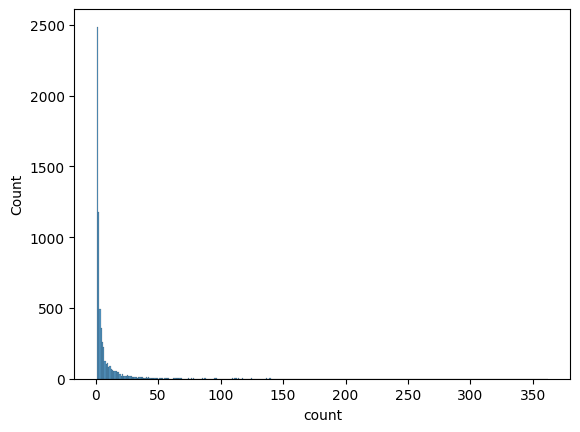

Car class


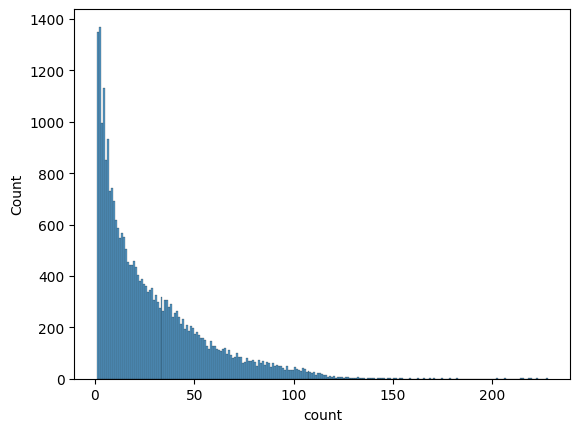

Van class


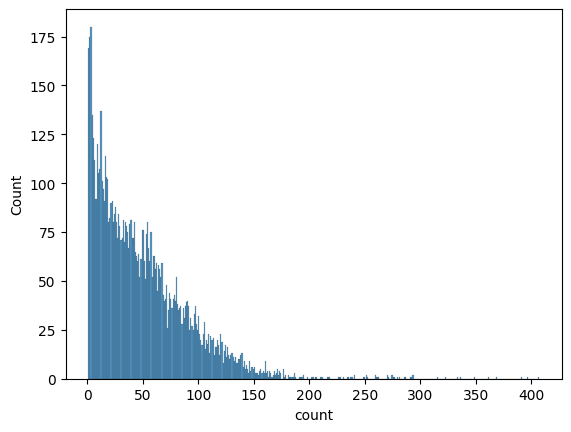

Box truck class


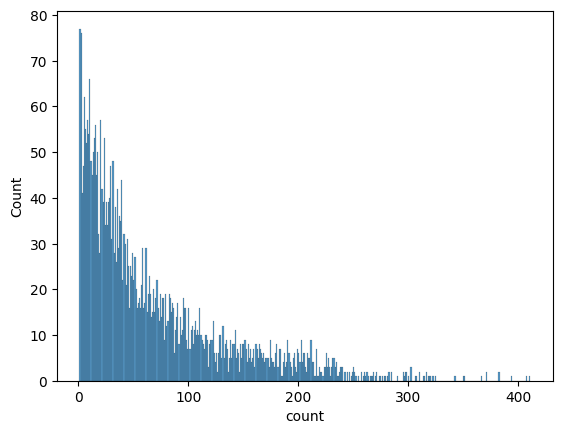

Truck class


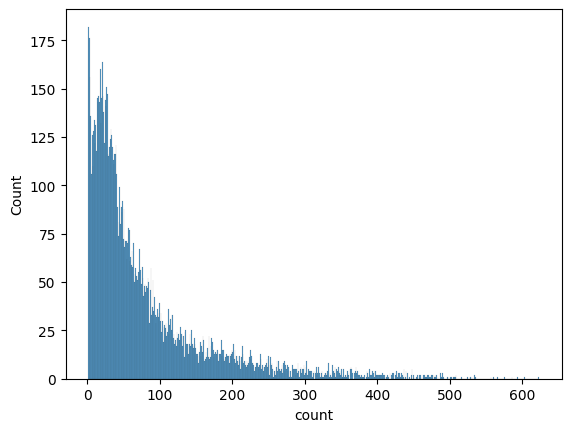

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

print('Noise class')
sns.histplot(df_counts[(df_counts['classID'] == 0)], x='count', binwidth=1)
plt.show()

print('Car class')
sns.histplot(df_counts[(df_counts['classID'] == 1)], x='count', binwidth=1)
plt.show()

print('Van class')
sns.histplot(df_counts[(df_counts['classID'] == 2)], x='count', binwidth=1)
plt.show()

print('Box truck class')
sns.histplot(df_counts[(df_counts['classID'] == 3)], x='count', binwidth=1)
plt.show()

print('Truck class')
sns.histplot(df_counts[(df_counts['classID'] == 4)], x='count', binwidth=1)
plt.show()